# Project 3.  Due October 31

In [2]:
import sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy.linalg as LA

/Users/sophialin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### The attached file, 'polluteddata.csv', contains the following data.
### We took intraday price values for an asset; this time series was then split into half-hour intervals for a total of 1709 intervals

In [3]:
data = pd.read_csv('polluteddata.csv',header=None)
polluteddata = data.to_numpy()

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,-3.00,-8.26,-10.55,-8.56,-18.08,-12.67,-14.29,-16.08,...,-27.58,-31.51,-27.53,-25.24,-25.32,-24.44,-28.04,-30.94,-29.57,-27.56
1,1.0,0.0,0.12,-0.41,-2.56,0.15,-1.65,-5.14,-5.09,-8.06,...,-6.65,-5.43,-6.13,-3.42,-4.48,-4.85,-4.47,-4.68,-2.10,-0.28
2,2.0,0.0,-2.80,-3.46,-5.80,-3.86,-2.60,-5.30,-4.81,-3.30,...,-12.74,-13.02,-15.99,-14.15,-14.92,-16.80,-16.88,-19.53,-25.30,-19.60
3,3.0,0.0,-1.95,-9.58,-13.68,-13.64,-18.36,-22.33,-15.70,-16.69,...,-19.50,-17.76,-18.52,-20.12,-17.35,-14.18,-15.57,-15.42,-19.58,-17.68
4,4.0,0.0,-1.11,1.62,-0.34,-5.76,-2.53,-0.56,1.45,0.62,...,0.49,-3.04,-0.82,-8.32,-3.87,-10.33,-11.46,-8.94,-16.81,-16.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,1704.0,0.0,0.38,-0.73,-3.09,-2.31,-2.46,-7.22,-5.85,-4.63,...,-23.96,-19.09,-17.55,-23.27,-20.66,-18.36,-18.05,-16.96,-21.37,-25.62
1705,1705.0,0.0,-3.21,-9.32,-2.90,-7.39,-8.25,1.42,1.40,2.22,...,4.42,4.05,1.48,-7.24,-7.92,-15.95,-18.73,-14.73,-12.64,-12.91
1706,1706.0,0.0,-0.83,1.65,2.19,1.62,0.45,0.63,4.18,4.02,...,18.51,18.66,16.63,14.55,16.01,13.66,15.52,15.37,16.70,12.52
1707,1707.0,0.0,0.34,-0.90,-2.51,-2.15,-4.72,-4.57,-7.59,-5.22,...,0.95,3.28,-0.92,0.28,-2.47,-7.22,-9.03,-10.33,-12.30,-16.24


In [5]:
data.shape

(1709, 31)

### There are 1709 lines in this file, one for each half-hour interval.  Each line begins with the count of the corresponding half-hour

In [6]:
for t in range(3): #len(polluteddata[0,:])):
    print('half-hour',t, 'data:',polluteddata[t,:])

half-hour 0 data: [  0.     0.    -3.    -8.26 -10.55  -8.56 -18.08 -12.67 -14.29 -16.08
 -20.04 -15.81 -14.56 -17.34 -20.14 -15.96 -14.3  -15.82 -15.07 -12.39
 -20.65 -27.58 -31.51 -27.53 -25.24 -25.32 -24.44 -28.04 -30.94 -29.57
 -27.56]
half-hour 1 data: [  1.     0.     0.12  -0.41  -2.56   0.15  -1.65  -5.14  -5.09  -8.06
  -9.05 -14.9  -18.27 -16.18 -15.42 -13.8  -12.89 -12.87 -10.18 -12.7
  -9.21  -6.65  -5.43  -6.13  -3.42  -4.48  -4.85  -4.47  -4.68  -2.1
  -0.28]
half-hour 2 data: [  2.     0.    -2.8   -3.46  -5.8   -3.86  -2.6   -5.3   -4.81  -3.3
  -0.28   1.33   0.68   2.3    1.65  -9.32 -11.74 -11.49 -19.37 -11.8
 -10.87 -12.74 -13.02 -15.99 -14.15 -14.92 -16.8  -16.88 -19.53 -25.3
 -19.6 ]


### The data was constructed as follows for each half hour interval $t$.  Suppose that $p(t, k)$ denotes the price of the asset in minute $k$ of half-hour $t$.  Here $k = 0,1,\ldots, 29$.  
### The data in position $k+1$ of line $t$ of the file equals $p(t,k) - p(t,0)$, i.e. the change in price between minute $k$ and minute $0$.

### EXCEPT that:
### The data was <font color = "red">polluted</font> in a <font color = "red">significant and correlated</font> manner during a certain <font color = "red"> interval $[t_1, t_2]$ </font> of half-hours.
### Your task is to identify this interval $[t_1, t_2]$ as closely as possible, using <font color = "red">covariance analysis techniques</font>.
### Please use power method if you want to find the largest eigenvalue and its corresponding eigenvector for certain matrices.
### Please note that we are not interested in small, random noise.  We are looking for a large change in the covariance structure.

In [7]:
X = data.iloc[:, 1:].values


In [108]:
def runpower2(A, tolerance=1e-8, maxiters=1000, v0=None):
    """
    Power iteration for the dominant eigenpair of A.

    Parameters
    ----------
    A : (n, n) array_like
        Square matrix. For fastest/most reliable convergence, A should be symmetric
        (then you get the largest eigenvalue and its eigenvector).
    tolerance : float
        Relative residual tolerance for convergence.
    maxiters : int
        Maximum number of iterations.
    v0 : (n,) array_like or None
        Optional initial vector. If None, a random vector is used.

    Returns
    -------
    eigval : float
        Approximate dominant eigenvalue (Rayleigh quotient).
    eigvec : (n,) ndarray
        Corresponding unit-norm eigenvector.
    iters : int
        Number of iterations performed.
    converged : bool
        True if residual-based stopping criterion was met.
    """
    A = np.asarray(A, dtype=float)
    n, m = A.shape
    if n != m:
        raise ValueError("A must be square")

    # Initialize v
    if v0 is None:
        v = np.random.default_rng().standard_normal(n)    # or v = np.random.rand(n)
    else:
        v = np.asarray(v0, dtype=float).copy()
        if v.shape != (n,):
            raise ValueError(f"v0 must have shape ({n},)")

    # Normalize initial vector
    nv = np.linalg.norm(v)
    if nv == 0:
        raise ValueError("Initial vector v0 must be nonzero")
    v /= nv

    eigval = 0.0
    for t in range(1, maxiters + 1):
        w = A @ v
        nw = np.linalg.norm(w)
        if nw == 0:
            # v is in the null space (only possible if A is singular and unlucky init)
            return 0.0, v, t, False

        v = w / nw
        eigval_new = float(v @ (A @ v))

        # Residual-based stopping test: ||Av - λv|| / (|λ| + eps)
        # This is more reliable than comparing successive norms.
        res = np.linalg.norm(A @ v - eigval_new * v) / (abs(eigval_new) + 1e-15)
        if res < tolerance:
            return eigval_new, v, t, True

        eigval = eigval_new

    # Not converged within maxiters
    return eigval, v, maxiters, False

In [124]:
window_size = 100
T = X.shape[0]
largest_eigs = []
rolling_covariances = []
maxiters = 1000
tolerance = 1e-10
for t in range(window_size, T+1):
    window_data = X[t-window_size:t, :]
    window_cov = np.cov(window_data, rowvar=T)
    rolling_covariances.append(window_cov)
    eig_val = runpower2(window_cov, tolerance, maxiters, v0=None)[0]
    largest_eigs.append(eig_val)


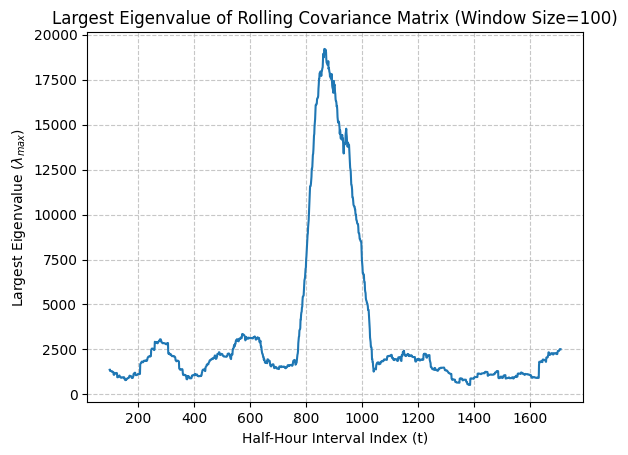

In [125]:
plt.plot(np.arange(window_size - 1, T), largest_eigs)
plt.title(f'Largest Eigenvalue of Rolling Covariance Matrix (Window Size={window_size})')
plt.xlabel('Half-Hour Interval Index (t)')
plt.ylabel('Largest Eigenvalue ($\lambda_{max}$)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [151]:
largest_eigs = np.array(largest_eigs)
T = largest_eigs.shape[0] 
baseline_data = largest_eigs[:750] 
baseline_mean = np.mean(baseline_data)
baseline_std = np.std(baseline_data)

k_std = 5
threshold = baseline_mean + k_std * baseline_std

print(f"Baseline Mean: {baseline_mean:.2f}")
print(f"Baseline St. Dev: {baseline_std:.2f}")
print(f"Chosen Threshold: {threshold:.2f}\n")

Baseline Mean: 2755.34
Baseline St. Dev: 3006.87
Chosen Threshold: 17789.70



In [152]:
exceeding_t = np.where(largest_eigs > threshold)[0]

In [153]:
if len(exceeding_t) == 0:
    print("Error: No data points exceeded the calculated threshold.")
else:
    t_start = exceeding_t[0]
    t_end = np.argmax(largest_eigs)
    t_1 = t_start + (window_size - 1)
    t_2 = t_end + (window_size - 1)

    print(f"Interval [t1, t2] where the pollution is detected (Eigenvalue > {threshold:.0f}):")
    print(f"t1: {t_1}")
    print(f"t2: {t_2}")
    print(f"Length of polluted interval: {t_2 - t_1 + 1} half-hour intervals")

Interval [t1, t2] where the pollution is detected (Eigenvalue > 17790):
t1: 848
t2: 865
Length of polluted interval: 18 half-hour intervals


In [154]:
interval = X[t_1:t_2+1, :]
interval_df = pd.DataFrame(interval)

In [155]:
corr_mat = interval_df.T.corr()

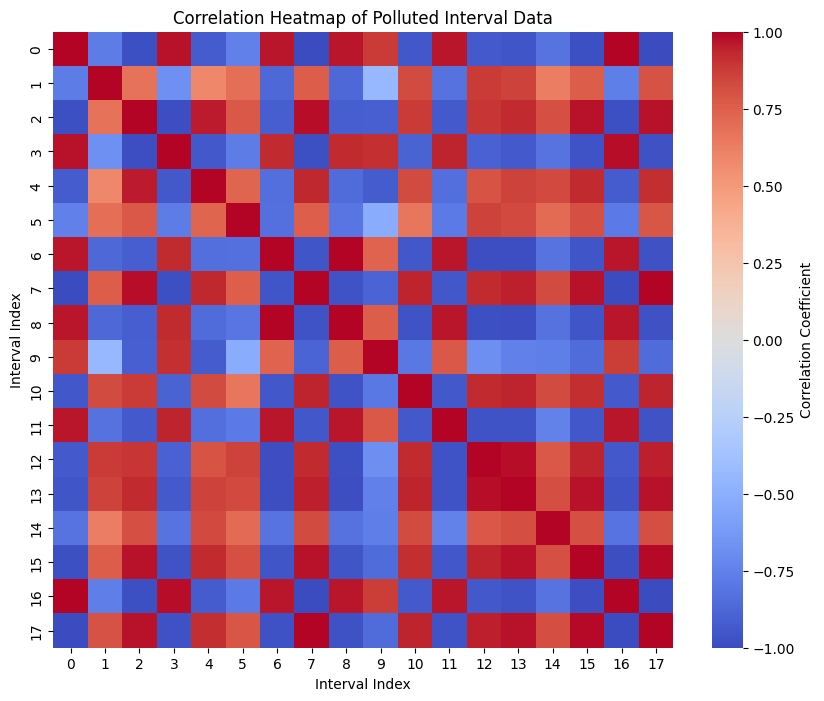

In [156]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_mat,
    annot=False,  
    cmap='coolwarm', 
    vmin=-1,       
    vmax=1,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap of Polluted Interval Data')
plt.xlabel('Interval Index')
plt.ylabel('Interval Index')
plt.show()